In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from collections import defaultdict
from glob import glob

import numpy as np
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import get_sa_scores, is_in_pubchem, is_valid
from gptchem.plotsettings import *
from gptchem.settings import ONE_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_WIDTH_INCH

In [13]:
all_res = glob("out/*/*.pkl")

In [14]:
len(all_res)

21

In [15]:
compiled_res = []
generated_smiles = set()
generated_smiles_at_temp = defaultdict(set)

for res_path in all_res:
    res = load_pickle(res_path)
    for temp_res in res["res_at_temp"]:
        try:
            generated_smiles = [s.split()[0] for s in temp_res["generated_smiles"]]
            in_train_smiles = []
            novel_indices = []
            for i, s in enumerate(temp_res["valid_smiles"]):
                s = s.split()[0]
                if s in temp_res["train_smiles"].values:
                    in_train_smiles.append(s)
                else:
                    novel_indices.append(i)

            metrics = {
                "noise_level": res["noise_level"],
                "temp": temp_res["temperature"],
                "frac_valid": temp_res["frac_valid"],
                "frac_unique": temp_res["frac_unique"],
                "frac_smiles_in_train": len(in_train_smiles) / len(temp_res["valid_smiles"]),
                "frac_smiles_in_pubchem": sum(
                    [is_in_pubchem(s.split()[0]) for s in temp_res["valid_smiles"]]
                )
                / len(temp_res["valid_smiles"]),
                "kld": temp_res["kld"],
                "frechet_d": temp_res["frechet_d"],
                "frechet_score": temp_res["frechet_score"],
                "train_size": res["train_size"],
            }
            valid_smiles = [s for s in generated_smiles if is_valid(s)]

            metrics["sa_score"] = np.mean(get_sa_scores(valid_smiles))

            v = [s for s in generated_smiles if is_valid(s)]
            generated_smiles_at_temp[temp_res["temperature"]].update(v)

            for me, v in temp_res["constrain_satisfaction"].items():
                metrics[me] = v

            compiled_res.append(metrics)

        except Exception as e:
            print(e)
            pass

'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.BadRequest: error: '
'PUGREST.B

In [6]:
compiled_res = pd.DataFrame(compiled_res)

In [7]:
grouped = compiled_res.groupby(["train_size", "temp"]).agg(["mean", "std", sem])

In [10]:
grouped

noise_level         frac_valid         frac_unique          \
                       mean std sem       mean std sem        mean std sem   
train_size temp                                                              
300        0.0         0.01 NaN NaN       1.00 NaN NaN    0.010000 NaN NaN   
           0.1         0.01 NaN NaN       1.00 NaN NaN    0.050000 NaN NaN   
           0.2         0.01 NaN NaN       1.00 NaN NaN    0.150000 NaN NaN   
           0.5         0.01 NaN NaN       0.85 NaN NaN    0.505882 NaN NaN   

                frac_smiles_in_train  ... max_error mean_absolute_error      \
                                mean  ...       sem                mean std   
train_size temp                       ...                                     
300        0.0              1.000000  ...       NaN            1.196765 NaN   
           0.1              0.970000  ...       NaN            1.219410 NaN   
           0.2              0.910000  ...       NaN            1.234374 NaN   
           0.5              0.588235  ...       NaN            1.261043 NaN   

                    mean_squared_error              rmse          
                sem               mean std sem      mean std sem  
train_size temp                                                   
300        0.0  NaN           2.401147 NaN NaN  1.549563 NaN NaN  
           0.1  NaN           2.455124 NaN NaN  1.566883 NaN NaN  
           0.2  NaN           2.481347 NaN NaN  1.575229 NaN NaN  
           0.5  NaN           2.518268 NaN NaN  1.586905 NaN NaN  

[4 rows x 42 columns]

In [8]:
grouped_100 = grouped.loc[100]
grouped_300 = grouped.loc[300]
grouped_1000 = grouped.loc[1000]

KeyError: 100

In [ ]:
grouped_100

noise_level         frac_valid         frac_unique          \
            mean std sem       mean std sem        mean std sem   
temp                                                              
0.00        0.01 NaN NaN       0.01 NaN NaN    1.000000 NaN NaN   
0.10        0.01 NaN NaN       0.11 NaN NaN    0.363636 NaN NaN   
0.20        0.01 NaN NaN       0.14 NaN NaN    0.428571 NaN NaN   
0.50        0.01 NaN NaN       0.13 NaN NaN    1.000000 NaN NaN   
0.75        0.01 NaN NaN       0.08 NaN NaN    1.000000 NaN NaN   
1.00        0.01 NaN NaN       0.03 NaN NaN    1.000000 NaN NaN   
1.25        0.01 NaN NaN       0.02 NaN NaN    1.000000 NaN NaN   
1.50        0.01 NaN NaN       0.10 NaN NaN    1.000000 NaN NaN   

     frac_smiles_in_train  ... max_error mean_absolute_error          \
                     mean  ...       sem                mean std sem   
temp                       ...                                         
0.00                  0.0  ...       NaN            3.074696 NaN NaN   
0.10                  0.0  ...       NaN            1.488117 NaN NaN   
0.20                  0.0  ...       NaN            1.002018 NaN NaN   
0.50                  0.0  ...       NaN            0.775502 NaN NaN   
0.75                  0.0  ...       NaN            1.111184 NaN NaN   
1.00                  0.0  ...       NaN            0.728456 NaN NaN   
1.25                  0.0  ...       NaN           12.779204 NaN NaN   
1.50                  0.0  ...       NaN            9.635825 NaN NaN   

     mean_squared_error               rmse          
                   mean std sem       mean std sem  
temp                                                
0.00           9.453756 NaN NaN   3.074696 NaN NaN  
0.10           2.789882 NaN NaN   1.670294 NaN NaN  
0.20           1.511218 NaN NaN   1.229316 NaN NaN  
0.50           0.779535 NaN NaN   0.882913 NaN NaN  
0.75           1.463061 NaN NaN   1.209570 NaN NaN  
1.00           1.018536 NaN NaN   1.009226 NaN NaN  
1.25         163.308055 NaN NaN  12.779204 NaN NaN  
1.50         129.220962 NaN NaN  11.367540 NaN NaN  

[8 rows x 42 columns]

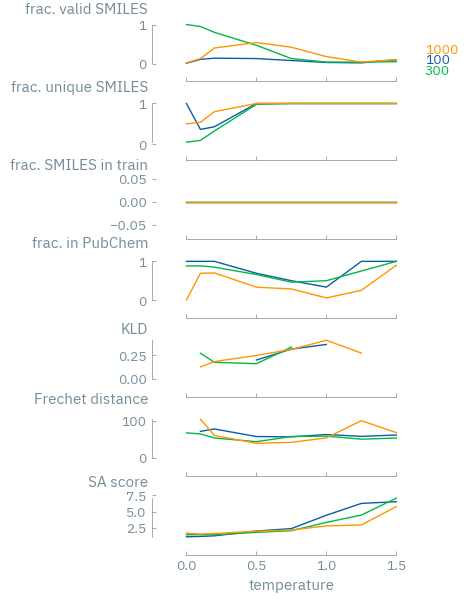

In [ ]:
fig, ax = plt.subplots(7, 1, sharex="col", figsize=(ONE_COL_WIDTH_INCH, 2 * ONE_COL_WIDTH_INCH))
ax[0].plot(grouped_100.index, grouped_100["frac_valid"]["mean"], label="100")
ax[0].fill_between(
    grouped_100.index,
    grouped_100["frac_valid"]["mean"] - grouped_100["frac_valid"]["sem"],
    grouped_100["frac_valid"]["mean"] + grouped_100["frac_valid"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. valid SMILES", ax=ax[0], x_pad=0.05, y_pad=-0.02)


ax[1].plot(grouped_100.index, grouped_100["frac_unique"]["mean"], label="frac_unique")
ax[1].fill_between(
    grouped_100.index,
    grouped_100["frac_unique"]["mean"] - grouped_100["frac_unique"]["sem"],
    grouped_100["frac_unique"]["mean"] + grouped_100["frac_unique"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. unique SMILES", ax=ax[1], x_pad=0.05)

ax[2].plot(
    grouped_100.index, grouped_100["frac_smiles_in_train"]["mean"], label="frac_smiles_in_train"
)
ax[2].fill_between(
    grouped_100.index,
    grouped_100["frac_smiles_in_train"]["mean"] - grouped_100["frac_smiles_in_train"]["sem"],
    grouped_100["frac_smiles_in_train"]["mean"] + grouped_100["frac_smiles_in_train"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. SMILES in train", ax=ax[2], x_pad=0.05)


ax[3].plot(
    grouped_100.index, grouped_100["frac_smiles_in_pubchem"]["mean"], label="frac_smiles_in_pubchem"
)
ax[3].fill_between(
    grouped_100.index,
    grouped_100["frac_smiles_in_pubchem"]["mean"] - grouped_100["frac_smiles_in_pubchem"]["sem"],
    grouped_100["frac_smiles_in_pubchem"]["mean"] + grouped_100["frac_smiles_in_pubchem"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. in PubChem", ax=ax[3], x_pad=0.05, y_pad=0.05)


ax[4].plot(grouped_100.index, grouped_100["kld"]["mean"], label="kld")
ax[4].fill_between(
    grouped_100.index,
    grouped_100["kld"]["mean"] - grouped_100["kld"]["sem"],
    grouped_100["kld"]["mean"] + grouped_100["kld"]["sem"],
    alpha=0.2,
)

ylabel_top("KLD", ax=ax[4], x_pad=0.05, y_pad=0.35)


ax[5].plot(grouped_100.index, grouped_100["frechet_d"]["mean"], label="frechet_d")
ax[5].fill_between(
    grouped_100.index,
    grouped_100["frechet_d"]["mean"] - grouped_100["frechet_d"]["sem"],
    grouped_100["frechet_d"]["mean"] + grouped_100["frechet_d"]["sem"],
    alpha=0.2,
)

ylabel_top("Frechet distance", ax=ax[5], x_pad=0.05, y_pad=0.35)


ax[6].plot(grouped_100.index, grouped_100["sa_score"]["mean"], label="frechet_score")
ax[6].fill_between(
    grouped_100.index,
    grouped_100["sa_score"]["mean"] - grouped_100["sa_score"]["sem"],
    grouped_100["sa_score"]["mean"] + grouped_100["sa_score"]["sem"],
    alpha=0.2,
)

ylabel_top("SA score", ax=ax[6], x_pad=0.05)


ax[-1].set_xlabel("temperature", labelpad=4)

ax[0].plot(grouped_300.index, grouped_300["frac_valid"]["mean"], label="300")
ax[0].fill_between(
    grouped_300.index,
    grouped_300["frac_valid"]["mean"] - grouped_300["frac_valid"]["sem"],
    grouped_300["frac_valid"]["mean"] + grouped_300["frac_valid"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. valid SMILES", ax=ax[0], x_pad=0.05, y_pad=-0.02)


ax[1].plot(grouped_300.index, grouped_300["frac_unique"]["mean"], label="frac_unique")
ax[1].fill_between(
    grouped_300.index,
    grouped_300["frac_unique"]["mean"] - grouped_300["frac_unique"]["sem"],
    grouped_300["frac_unique"]["mean"] + grouped_300["frac_unique"]["sem"],
    alpha=0.2,
)


ylabel_top("frac. unique SMILES", ax=ax[1], x_pad=0.05)

ax[2].plot(
    grouped_300.index, grouped_300["frac_smiles_in_train"]["mean"], label="frac_smiles_in_train"
)
ax[2].fill_between(
    grouped_300.index,
    grouped_300["frac_smiles_in_train"]["mean"] - grouped_300["frac_smiles_in_train"]["sem"],
    grouped_300["frac_smiles_in_train"]["mean"] + grouped_300["frac_smiles_in_train"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. SMILES in train", ax=ax[2], x_pad=0.05)


ax[3].plot(
    grouped_300.index, grouped_300["frac_smiles_in_pubchem"]["mean"], label="frac_smiles_in_pubchem"
)
ax[3].fill_between(
    grouped_300.index,
    grouped_300["frac_smiles_in_pubchem"]["mean"] - grouped_300["frac_smiles_in_pubchem"]["sem"],
    grouped_300["frac_smiles_in_pubchem"]["mean"] + grouped_300["frac_smiles_in_pubchem"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. in PubChem", ax=ax[3], x_pad=0.05, y_pad=0.05)


ax[4].plot(grouped_300.index, grouped_300["kld"]["mean"], label="kld")
ax[4].fill_between(
    grouped_300.index,
    grouped_300["kld"]["mean"] - grouped_300["kld"]["sem"],
    grouped_300["kld"]["mean"] + grouped_300["kld"]["sem"],
    alpha=0.2,
)

ylabel_top("KLD", ax=ax[4], x_pad=0.05, y_pad=0.35)


ax[5].plot(grouped_300.index, grouped_300["frechet_d"]["mean"], label="frechet_d")
ax[5].fill_between(
    grouped_300.index,
    grouped_300["frechet_d"]["mean"] - grouped_300["frechet_d"]["sem"],
    grouped_300["frechet_d"]["mean"] + grouped_300["frechet_d"]["sem"],
    alpha=0.2,
)

ylabel_top("Frechet distance", ax=ax[5], x_pad=0.05, y_pad=0.35)


ax[6].plot(grouped_300.index, grouped_300["sa_score"]["mean"], label="frechet_score")
ax[6].fill_between(
    grouped_300.index,
    grouped_300["sa_score"]["mean"] - grouped_300["sa_score"]["sem"],
    grouped_300["sa_score"]["mean"] + grouped_300["sa_score"]["sem"],
    alpha=0.2,
)

ylabel_top("SA score", ax=ax[6], x_pad=0.05)


ax[-1].set_xlabel("temperature", labelpad=4)

ax[0].plot(grouped_1000.index, grouped_1000["frac_valid"]["mean"], label="1000")
ax[0].fill_between(
    grouped_1000.index,
    grouped_1000["frac_valid"]["mean"] - grouped_1000["frac_valid"]["sem"],
    grouped_1000["frac_valid"]["mean"] + grouped_1000["frac_valid"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. valid SMILES", ax=ax[0], x_pad=0.05, y_pad=-0.02)


ax[1].plot(grouped_1000.index, grouped_1000["frac_unique"]["mean"], label="frac_unique")
ax[1].fill_between(
    grouped_1000.index,
    grouped_1000["frac_unique"]["mean"] - grouped_1000["frac_unique"]["sem"],
    grouped_1000["frac_unique"]["mean"] + grouped_1000["frac_unique"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. unique SMILES", ax=ax[1], x_pad=0.05)

ax[2].plot(
    grouped_1000.index, grouped_1000["frac_smiles_in_train"]["mean"], label="frac_smiles_in_train"
)
ax[2].fill_between(
    grouped_1000.index,
    grouped_1000["frac_smiles_in_train"]["mean"] - grouped_1000["frac_smiles_in_train"]["sem"],
    grouped_1000["frac_smiles_in_train"]["mean"] + grouped_1000["frac_smiles_in_train"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. SMILES in train", ax=ax[2], x_pad=0.05)


ax[3].plot(
    grouped_1000.index,
    grouped_1000["frac_smiles_in_pubchem"]["mean"],
    label="frac_smiles_in_pubchem",
)
ax[3].fill_between(
    grouped_1000.index,
    grouped_1000["frac_smiles_in_pubchem"]["mean"] - grouped_1000["frac_smiles_in_pubchem"]["sem"],
    grouped_1000["frac_smiles_in_pubchem"]["mean"] + grouped_1000["frac_smiles_in_pubchem"]["sem"],
    alpha=0.2,
)

ylabel_top("frac. in PubChem", ax=ax[3], x_pad=0.05, y_pad=0.05)


ax[4].plot(grouped_1000.index, grouped_1000["kld"]["mean"], label="kld")
ax[4].fill_between(
    grouped_1000.index,
    grouped_1000["kld"]["mean"] - grouped_1000["kld"]["sem"],
    grouped_1000["kld"]["mean"] + grouped_1000["kld"]["sem"],
    alpha=0.2,
)

ylabel_top("KLD", ax=ax[4], x_pad=0.05, y_pad=-0.05)


ax[5].plot(grouped_1000.index, grouped_1000["frechet_d"]["mean"], label="frechet_d")
ax[5].fill_between(
    grouped_1000.index,
    grouped_1000["frechet_d"]["mean"] - grouped_1000["frechet_d"]["sem"],
    grouped_1000["frechet_d"]["mean"] + grouped_1000["frechet_d"]["sem"],
    alpha=0.2,
)

ylabel_top("Frechet distance", ax=ax[5], x_pad=0.05, y_pad=0.15)


ax[6].plot(grouped_1000.index, grouped_1000["sa_score"]["mean"], label="frechet_score")
ax[6].fill_between(
    grouped_1000.index,
    grouped_1000["sa_score"]["mean"] - grouped_1000["sa_score"]["sem"],
    grouped_1000["sa_score"]["mean"] + grouped_1000["sa_score"]["sem"],
    alpha=0.2,
)

ylabel_top("SA score", ax=ax[6], x_pad=0.05, y_pad=0.35)

range_frame(
    ax[0],
    grouped_300.index,
    np.stack(
        [
            grouped_100["frac_valid"]["mean"],
            grouped_300["frac_valid"]["mean"],
            grouped_1000["frac_valid"]["mean"],
        ]
    ),
)


range_frame(
    ax[1],
    grouped_300.index,
    np.stack(
        [
            grouped_100["frac_unique"]["mean"],
            grouped_300["frac_unique"]["mean"],
            grouped_1000["frac_unique"]["mean"],
        ]
    ),
)

range_frame(
    ax[2],
    grouped_300.index,
    np.stack(
        [
            grouped_100["frac_smiles_in_train"]["mean"],
            grouped_300["frac_smiles_in_train"]["mean"],
            grouped_1000["frac_smiles_in_train"]["mean"],
        ]
    ),
)

range_frame(
    ax[3],
    grouped_300.index,
    np.stack(
        [
            grouped_100["frac_smiles_in_pubchem"]["mean"],
            grouped_300["frac_smiles_in_pubchem"]["mean"],
            grouped_1000["frac_smiles_in_pubchem"]["mean"],
        ]
    ),
)


range_frame(
    ax[4],
    grouped_300.index,
    np.nan_to_num(
        np.stack(
            [
                grouped_100["kld"]["mean"],
                grouped_300["kld"]["mean"],
                grouped_1000["kld"]["mean"],
            ]
        ),
        0.5,
    ),
)

range_frame(
    ax[5],
    grouped_300.index,
    np.nan_to_num(
        np.stack(
            [
                grouped_100["frechet_d"]["mean"],
                grouped_300["frechet_d"]["mean"],
                grouped_1000["frechet_d"]["mean"],
            ]
        ),
        10,
    ),
)


range_frame(
    ax[6],
    grouped_300.index,
    np.stack(
        [
            grouped_100["sa_score"]["mean"],
            grouped_300["sa_score"]["mean"],
            grouped_1000["sa_score"]["mean"],
        ]
    ),
)


ax[-1].set_xlabel("temperature", labelpad=4)

matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.7, top=1, bottom=0.2)

fig.savefig("random_homo_lumo_gap_small.pdf", bbox_inches="tight")

NameError: name 'grouped_100' is not defined

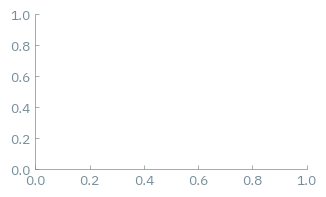

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))


ax.plot(grouped_100.index, grouped_100["mean_absolute_error"]["mean"], marker="o", label="100")

ax.plot(grouped_300.index, grouped_300["mean_absolute_error"]["mean"], marker="o", label="300")


ax.plot(grouped_1000.index, grouped_1000["mean_absolute_error"]["mean"], marker="o", label="1000")

range_frame(ax, np.array([0, 1.5]), np.array([0.6, 1.5]))

matplotx.line_labels(ax)

ax.set_xlabel("temperature")
ylabel_top("MAE / eV", ax=ax)
fig.savefig("random_smiles_homo_lumo_mae_small.pdf", bbox_inches="tight")